# Import packages

In [1]:
import nltk
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import wordnet
import pandas as pd
import matplotlib.pyplot as plt
import string    


# Load the Brown corpus data from NLTK

In [2]:
# Download the Brown corpus
nltk.download('brown')     

print('Categories: \n')

# Print the name of all categories in alphabetical order
for category in sorted(brown.categories()):  
    print(category)

Categories: 

adventure
belles_lettres
editorial
fiction
government
hobbies
humor
learned
lore
mystery
news
religion
reviews
romance
science_fiction


[nltk_data] Downloading package brown to /Users/bill/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [3]:
brown_corpus = pd.DataFrame()
category_name = []
count_words, count_sentences, count_paragraphs = [], [], []
common_words, common_words_after_preprocessing = [], []


# Build a set of stopwords and punctuation
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english') + list(string.punctuation))


# Fill data in each category per row
for category_name in brown.categories(): 
    fileids = brown.fileids(category_name)
    words = brown.words(fileids=fileids)    
    count_words.append(len(words))
    count_sentences.append(len(brown.sents(fileids=fileids)))        # Get list of sentences
    count_paragraphs.append(len(brown.paras(fileids=fileids)))       # Get list of paragraphs
    common_words.append(list(pd.Series(words).value_counts()[:10].keys()))              # Choose top 10 frequent words
    words_after_preprocessing = [w for w in words if w not in stop and w.isalpha()]     # Remove stopwords and punctuation
    common_words_after_preprocessing.append(list(pd.Series(words_after_preprocessing).value_counts()[:10].keys()))   # Choose top 10 frequent words after removing stopwords and punctuation


# Add columns to the dataframe brown_corpus
brown_corpus['category_name'] = brown.categories()
brown_corpus['count_words'] = count_words
brown_corpus['count_sentences'] = count_sentences
brown_corpus['count_paragraphs'] = count_paragraphs
brown_corpus['common_words'] = common_words
brown_corpus['common_words_after_preprocessing'] = common_words_after_preprocessing

brown_corpus.head(10)  

[nltk_data] Downloading package stopwords to /Users/bill/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,adventure,69342,4637,1387,"[., ,, the, and, a, of, to, ``, '', was]","[I, He, The, said, would, man, back, one, coul..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[The, I, one, would, He, In, It, But, time, man]"
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[The, I, would, one, But, It, He, In, new, Ame..."
3,fiction,68488,4249,1043,"[,, ., the, and, to, of, a, was, in, he]","[I, He, The, would, said, one, could, It, like..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[The, year, States, United, may, In, would, ma..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, to, a, in, is, for]","[The, one, I, This, may, It, time, A, In, two]"
6,humor,21695,1053,254,"[,, the, ., of, and, a, to, ``, '', in]","[I, The, said, one, would, He, It, time, even,..."
7,learned,181888,7734,1418,"[the, ,, of, ., and, to, in, a, is, that]","[The, Af, In, one, may, would, It, This, A, two]"
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[The, one, I, In, would, It, time, may, first,..."
9,mystery,57169,3886,1164,"[., ,, the, to, and, a, of, was, ``, '']","[I, He, The, said, would, one, back, could, It..."


## Apply NLP operations on the corpus

### Stemming

In [4]:
# Stem the words from category 'news'
category_name = 'news'   

fileids = brown.fileids(category_name)
words = brown.words(fileids=fileids)
news_words = [w for w in words if w not in stop and w.isalpha()]    # Remove stopwords and punctuation
print(f'Number of unique words in news_words: {len(set(news_words))}')

# Create a Porter stemmer
stemmer = PorterStemmer()  

# Stem for each word
news_words_stems = [stemmer.stem(w) for w in news_words]    
print(f'Number of unique words after applying Porter stemmer: {len(set(news_words_stems))}')

Number of unique words in news_words: 12263
Number of unique words after applying Porter stemmer: 7805


In [5]:
# Stem the words from category 'fiction'
category_name = 'fiction'   

fileids = brown.fileids(category_name)
words = brown.words(fileids=fileids)
fiction_words = [w for w in words if w not in stop and w.isalpha()]  
print(f'Number of unique words in fiction_words: {len(set(fiction_words))}')

# Create a Snowball stemmer
stemmer = SnowballStemmer('english')  

fiction_words_stems = [stemmer.stem(w) for w in fiction_words]  
print(f'Number of unique words after applying Snowball stemmer: {len(set(fiction_words_stems))}')

Number of unique words in fiction_words: 8612
Number of unique words after applying Snowball stemmer: 5886


### Lemmatization

In [6]:
# Lemmatize the words of category 'government'
nltk.download('wordnet')

category_name = 'government'  

fileids = brown.fileids(category_name)
words = brown.words(fileids=fileids)
government_words = [w for w in words if w not in stop and w.isalpha()]    
print(f'Number of unique words before lemmatization: {len(set(government_words))}')

# Create a wordnet lemmatizer
lemmatizer = WordNetLemmatizer()   

# Lemmatize for each word
government_words_lemma = [lemmatizer.lemmatize(w) for w in government_words]   
print(f'Number of unique words after lemmatization: {len(set(government_words_lemma))}')

Number of unique words before lemmatization: 7132


[nltk_data] Downloading package wordnet to /Users/bill/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of unique words after lemmatization: 6392


### Synonymns and antonyms

In [7]:
def get_synonyms(words):
    """
    Get a list of synonyms

    Parameters
    ----------
    words: list
      Words.

    Returns
    -------
    List
      Synonyms
    """
    
    result_synonyms = set()
    for word in words:  
        for synset in wordnet.synsets(word):   
            for name in synset.lemma_names():   
                result_synonyms.add(name)      
    return list(result_synonyms)


def get_antonyms(words):
    """
    Get a list of antonyms

    Parameters
    ----------
    words: list
      Words.

    Returns
    -------
    List
      Antonyms.
    """
    
    result_antonyms = set()
    for word in words:  
        for synset in wordnet.synsets(word):  
            for lemma in synset.lemmas():      
                for antonym in lemma.antonyms():
                    result_antonyms.add(antonym.name())   
    return list(result_antonyms)


synonyms, antonyms = [ ], [ ]

# Apply get_synonyms & get_antonyms functions to the column common_words_after_preprocessing to extract all synonym and antonym words 
for words in brown_corpus['common_words_after_preprocessing']:
    synonyms.append(get_synonyms(words))  
    antonyms.append(get_antonyms(words))  
brown_corpus['synonyms'] = synonyms     
brown_corpus['antonyms'] = antonyms    

brown_corpus.head(10)  

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,adventure,69342,4637,1387,"[., ,, the, and, a, of, to, ``, '', was]","[I, He, The, said, would, man, back, one, coul...","[helium, articulate, atomic_number_53, order, ...","[civilian, woman, veer, ahead, advance, forwar..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[The, I, one, would, He, In, It, But, time, man]","[unrivalled, human_being, gentleman, helium, s...","[civilian, woman]"
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[The, I, would, one, But, It, He, In, new, Ame...","[unrivalled, novel, helium, American_English, ...","[worn, old]"
3,fiction,68488,4249,1043,"[,, ., the, and, to, of, a, was, in, he]","[I, He, The, would, said, one, could, It, like...","[aforesaid, unrivalled, helium, sound_out, com...","[unlike, dislike, unalike]"
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[The, year, States, United, may, In, would, ma...","[body_politic, piss, unify, wee-wee, submit, c...","[divided, unmade, divide, devolution, nondevel..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, to, a, in, is, for]","[The, one, I, This, may, It, time, A, In, two]","[unrivalled, sentence, deoxyadenosine_monophos...",[]
6,humor,21695,1053,254,"[,, the, ., of, and, a, to, ``, '', in]","[I, The, said, one, would, He, It, time, even,...","[aforesaid, unrivalled, helium, sentence, soun...","[uneven, odd]"
7,learned,181888,7734,1418,"[the, ,, of, ., and, to, in, a, is, that]","[The, Af, In, one, may, would, It, This, A, two]","[unrivalled, deoxyadenosine_monophosphate, unm...",[]
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[The, one, I, In, would, It, time, may, first,...","[initiatory, maiden, helium, atomic_number_53,...","[second, end, last, middle]"
9,mystery,57169,3886,1164,"[., ,, the, to, and, a, of, was, ``, '']","[I, He, The, said, would, one, back, could, It...","[helium, articulate, atomic_number_53, order, ...","[unlike, dislike, veer, ahead, unalike, advanc..."


### Bigrams

In [8]:
# Select the last 500 paragraphs
paragraphs = brown.paras()[-500:]    

def get_bigrams_frequency(paragraphs):
    """
    Get bigrams.

    Parameters
    ----------
    paragraphs: list
      Paragraphs.

    Returns
    -------
    Dictionary
      Bigrams and their corresponding frequencies.
    """
        
    result_bigrams = {}    
    
    for sentences in paragraphs:    
        for words in sentences:     
            words = [w for w in words if w not in stop and w.isalpha()]    
            for i in range(len(words) - 1):      
                key = '%s %s' % (words[i], words[i+1])     # Build word[i] and word[i+1] as a pair of bigram 
                result_bigrams[key] = result_bigrams.get(key, 0) + 1      # keys:bigrams; values:counts
    return result_bigrams


brown_bigrams = get_bigrams_frequency(paragraphs)

# Print the 15 most frequently occurring bigrams
for bigram in sorted(brown_bigrams.items(), key=lambda x: x[1], reverse=True)[:15]:
    print(bigram)

('I said', 25)
('I could', 12)
('I thought', 10)
('I know', 9)
('years ago', 9)
('New York', 8)
('I knew', 8)
('I would', 8)
('said I', 6)
('The boy', 6)
('I felt', 6)
('Hanford College', 6)
('humor comedy', 6)
('next morning', 5)
('I saw', 5)


## Visualisation

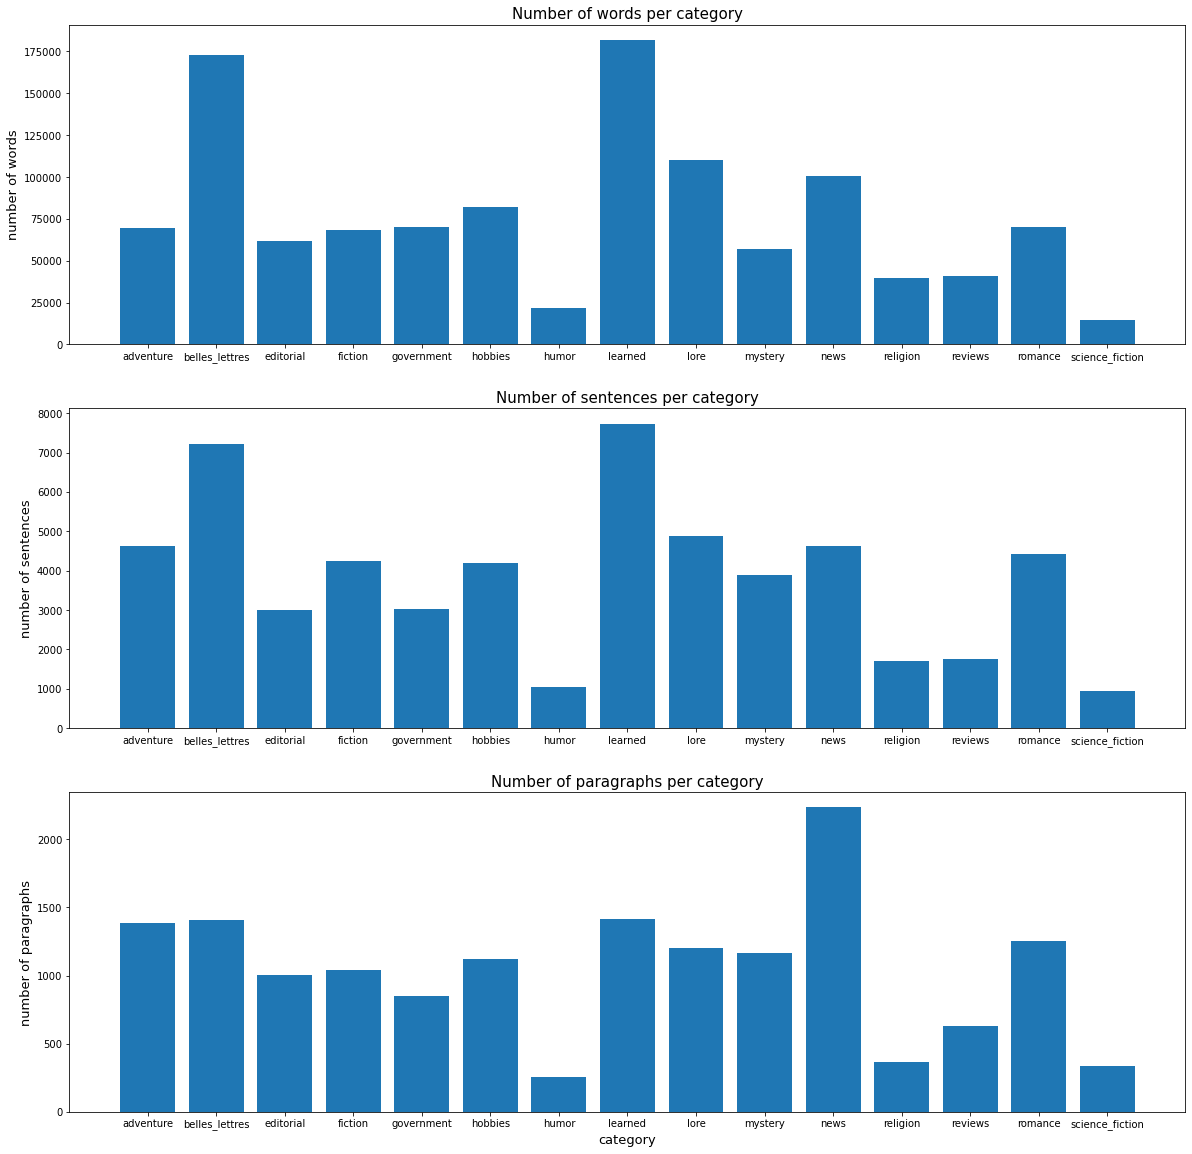

In [9]:
fig, axs = plt.subplots(3,1,figsize=(20,20))

axs[0].bar(brown_corpus['category_name'], brown_corpus['count_words'])
axs[0].set_ylabel('number of words', size=13)
axs[0].set_title('Number of words per category', size=15)

axs[1].bar(brown_corpus['category_name'], brown_corpus['count_sentences'])
axs[1].set_ylabel('number of sentences', size=13)
axs[1].set_title('Number of sentences per category', size=15)

axs[2].bar(brown_corpus['category_name'], brown_corpus['count_paragraphs'])
axs[2].set_xlabel('category', size=13)
axs[2].set_ylabel('number of paragraphs', size=13)
axs[2].set_title('Number of paragraphs per category', size=15)

plt.show()

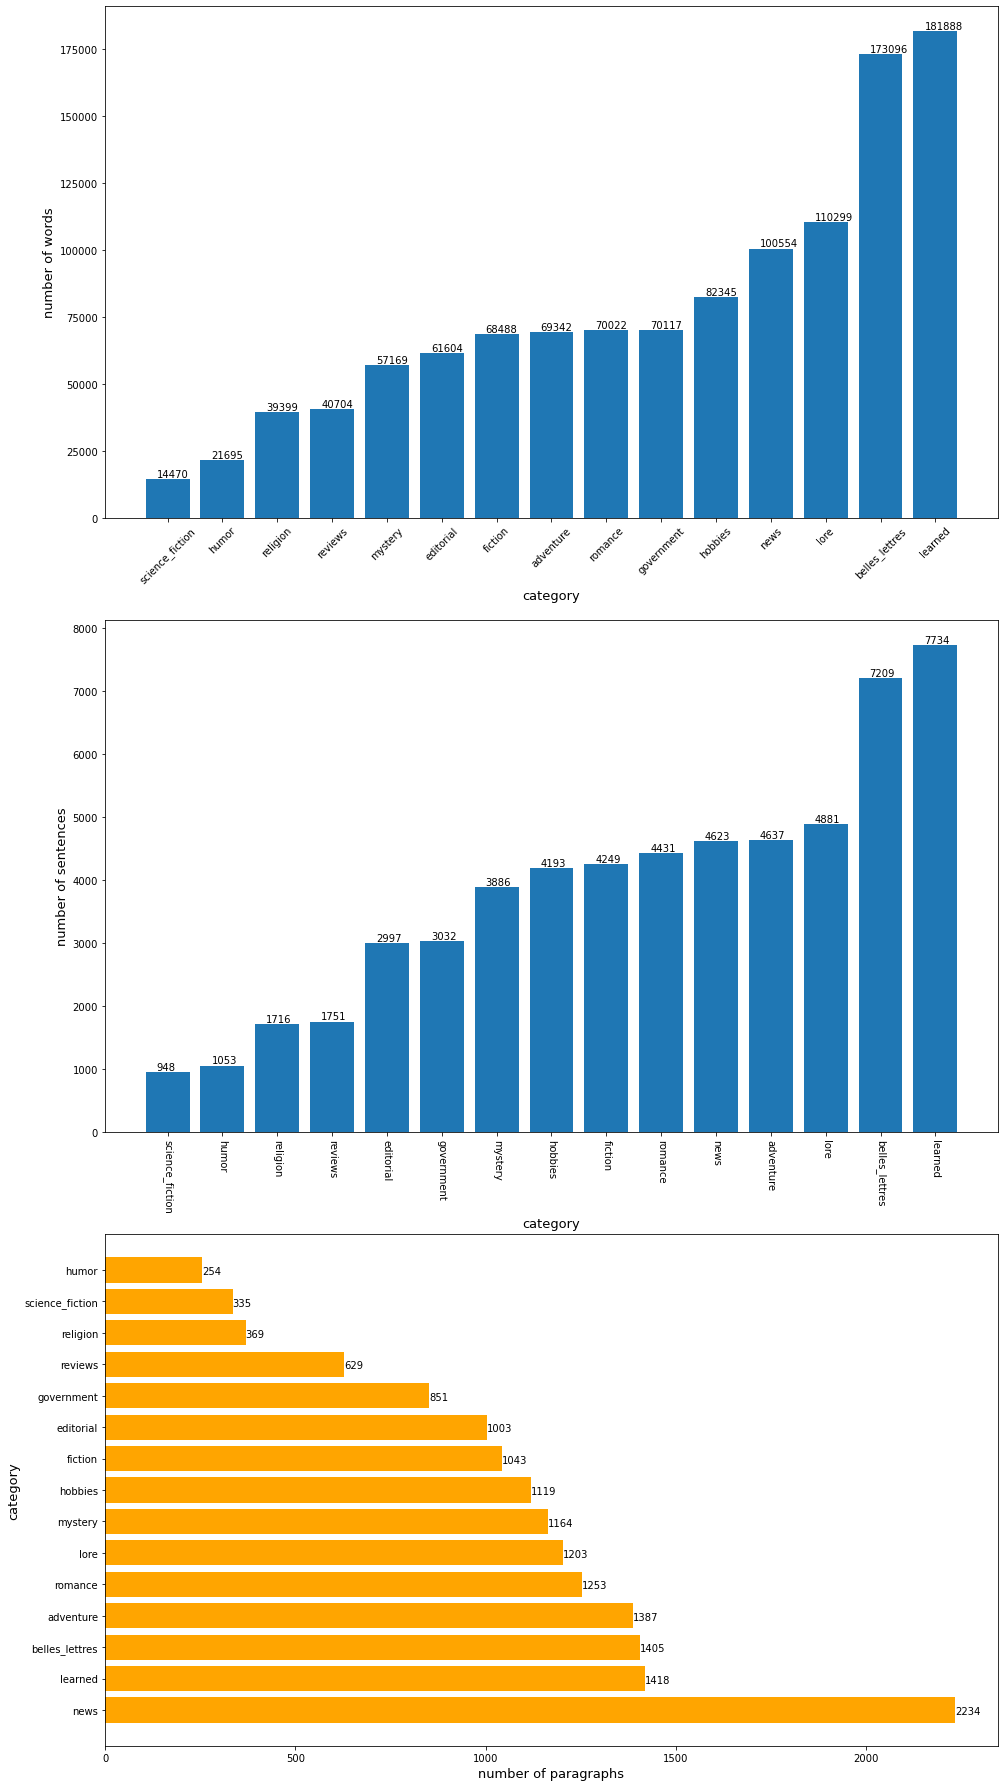

In [10]:
fig, axs = plt.subplots(3,1,figsize=(16,32))

# 1st plot
sorted_data = brown_corpus.sort_values(by='count_words').reset_index(drop=True)     
rect = axs[0].bar(range(len(sorted_data)), sorted_data['count_words'], tick_label=sorted_data['category_name']) 
for r in rect:    # Add count of words at the top of the bar
    axs[0].text(r.get_x()+r.get_width()/4, r.get_height(), r.get_height(), ha='left', va='bottom')
axs[0].set_xticklabels(sorted_data['category_name'], rotation = 45)  
axs[0].set_xlabel('category', size=13)
axs[0].set_ylabel('number of words', size=13)

# 2nd plot
sorted_data = brown_corpus.sort_values(by='count_sentences').reset_index(drop=True)     
rect = axs[1].bar(range(len(sorted_data)), sorted_data['count_sentences'], tick_label=sorted_data['category_name'])
for r in rect:      # Add count of sentences at the top of the bar
    axs[1].text(r.get_x()+r.get_width()/4, r.get_height(), r.get_height(), ha='left', va='bottom')
axs[1].set_xticklabels(sorted_data['category_name'], rotation = -90)
axs[1].set_xlabel('category', size=13)
axs[1].set_ylabel('number of sentences', size=13)

# 3rd plot
sorted_data = brown_corpus.sort_values(by='count_paragraphs', ascending=False).reset_index(drop=True)    
rect = axs[2].barh(range(len(sorted_data)), sorted_data['count_paragraphs'], color='orange', tick_label=sorted_data['category_name'])    
for r in rect:      # Add count of paragraphs at the side of the bar
    axs[2].text(r.get_width(), r.get_y()+r.get_height()/4, r.get_width(), ha='left', va='bottom')
axs[2].set_xlabel('number of paragraphs', size=13)
axs[2].set_ylabel('category', size=13)

plt.show()

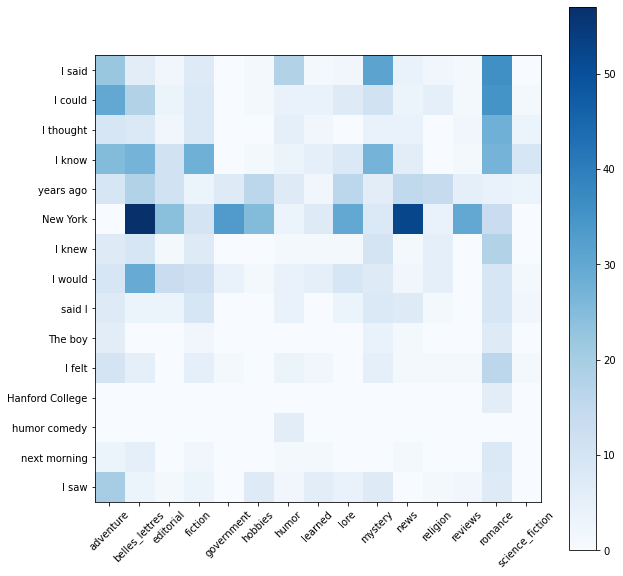

In [11]:
# Get the 15 most frequent bigrams 
top15_bigrams = []
for bigram, _ in sorted(brown_bigrams.items(), key=lambda x: x[1], reverse=True)[:15]:
    top15_bigrams.append(bigram)


# Build a map of category to bigram count
category_count = {} 
for category_name in brown.categories():
    category_count[category_name] = []
    fileids = brown.fileids(category_name)
    paragraphs = brown.paras(fileids=fileids)
    bigrams = get_bigrams_frequency(paragraphs)
    for bigram in top15_bigrams:
        category_count[category_name].append(bigrams.get(bigram, 0)) 


# Plot a heatmap
fig = plt.figure(figsize=(10,10))
heatmap = pd.DataFrame(category_count, index=top15_bigrams)
plt.xticks(range(len(heatmap.columns)), heatmap.columns, rotation=45)
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.imshow(heatmap, cmap='Blues')       
plt.colorbar()      
plt.show()